# Notebook : Limpieza de DataSets

### Integrantes
- Victor Villarreal
- Cristian Garcia

In [ ]:
# Instalación de dependencias
%pip install pandas matplotlib seaborn

In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Iris Sucio

Es un dataset que contiene información de medidas de flores Iris.

### Problemas

- Valores faltantes (NaN)
- Especies escritas con incosistencias: Setosa, SETOSA, setosa

### Carga de datos

In [8]:
# Cargamos el dataset (archivo CSV)
iris_dirty = pd.read_csv("data/iris_dirty.csv")

# Imprimimos los 10 primeros datos, para tratar de observar su estructura y alguna inconsistencia que se pueda ver a simple vista.
iris_dirty.head(10)

Unnamed: 0  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           1           5.1          3.5           1.4          0.2  Setosa
1           2           4.9          3.0           1.4          0.2  setosa
2           3           4.7          3.2           1.3          0.2  setosa
3           4           4.6          3.1           1.5          0.2  setosa
4           5           NaN          3.6           1.4          0.2  setosa
5           6           5.4          NaN           1.7          0.4  setosa
6           7           4.6          3.4           1.4          0.3  setosa
7           8           5.0          3.4           1.5          0.2  SETOSA
8           9           4.4          2.9           1.4          0.2  setosa
9          10           4.9          NaN           1.5          0.1  setosa

Observamos que las columnas no tienen un nombre estandar, hay elementos NaN (nulos), y efectivamente tenemos texto con inconsistencias. A continuación, vamos a ver con cuantos datos estamos trabajando, y un poco de información extra de cada una de las columnas.

In [12]:
print("Dimensiones (filas, columnas):", iris_dirty.shape) # Observar las dimensiones del DataFrame (rows, cols)

print("Tamaño total (número de elementos):", iris_dirty.size) # Observar el tamaño total del DataFrame (número de elementos)

Dimensiones (filas, columnas): (150, 6)
Tamaño total (número de elementos): 900


Ahora que sabemos cuantas filas hay, vamos a ver información extra de cada columna, con la intención de observar que tantos datos nulos tenemos y asegurarnos que el tipo de dato de cada columna sea el correcto.

In [5]:
# Veamos informacion mas detallada de cada una de las columnas

iris_dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   Sepal.Length  142 non-null    float64
 2   Sepal.Width   139 non-null    float64
 3   Petal.Length  150 non-null    float64
 4   Petal.Width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Podemos observar que los tipos de datos son los correctos para cada columna, y sabemos que hay 150 filas, por ende, podemos ver que las unicas columnas con valores nulos son actualmente Sepal.Length y Sepal.Width, pero, estos nombres no estan estandarizados, antes de continuar con los datos nulos, vamos a estandarizar el nombre de las columnas.

### Estandarización del nombre de las columnas

In [13]:
# Ahora, vamos a estandarizar el nombre de las columnas a snake_case

# Función para convertir a snake_case los nombres de las columnas de este dataset
def snake_case(s: str):
    s = s.replace(".", "_") # Reemplazamos los puntos por guiones bajos
    s = s.strip() # Eliminamos espacios en blanco al inicio y al final
    return s.lower() # Retornamos el string en minúsculas

iris_dirty.columns = [snake_case(c) for c in iris_dirty.columns] # Estandarizamos los nombres de las columnas

# Observamos el comportamiento de la columna unnamed: 0, y al parecer esa columna simplemente es un identificador de cada elemento,
# vamos a reemplazar el nombre de esa columna por el nombre de "id"

iris_dirty = iris_dirty.rename(columns={"unnamed: 0": "id"})

iris_dirty

id  sepal_length  sepal_width  petal_length  petal_width    species
0      1           5.1          3.5           1.4          0.2     Setosa
1      2           4.9          3.0           1.4          0.2     setosa
2      3           4.7          3.2           1.3          0.2     setosa
3      4           4.6          3.1           1.5          0.2     setosa
4      5           NaN          3.6           1.4          0.2     setosa
..   ...           ...          ...           ...          ...        ...
145  146           6.7          3.0           5.2          2.3  virginica
146  147           6.3          2.5           5.0          1.9  virginica
147  148           6.5          3.0           5.2          2.0  virginica
148  149           6.2          3.4           5.4          2.3  virginica
149  150           NaN          3.0           5.1          1.8  virginica

[150 rows x 6 columns]

Podemos observar que ya los nombres estan estandarizados, ahora, vamos a encargarnos de manejar esos datos nulos, pero antes, confirmemos cuantos datos nulos hay y su respectivo porcentaje por columna (perfil de calidad) y si tenemos datos duplicados.

### Detecto y manejo de valores nulos

In [14]:
# Hacemos una funcion para contar los valores nulos y unicos de cada columna, junto a su respectivo tipo de dato, 
# para tener un informe de calidad de los datos.

def quality_report(iris_dirty: pd.DataFrame) -> pd.DataFrame:
    rep = pd.DataFrame({
        "dtype": iris_dirty.dtypes.astype(str),                # Tipo de dato de cada columna
        "n_nulls": iris_dirty.isna().sum(),                    # Contamos el numero de valores nulos de cada columna
        "pct_nulls": (iris_dirty.isna().mean()*100).round(2),  # Porcentaje de valores nulos de cada columna
        "n_unique": iris_dirty.nunique(dropna=False)           # Contamos los valores unicos de cada columna
    })
    return rep

# Imprimimos la informacion y vemos cuantos datos tenemos exactamente duplicados.

print(quality_report(iris_dirty))
print("Duplicados exactos:", iris_dirty.duplicated().sum()) # Contamos los duplicados exactos

                dtype  n_nulls  pct_nulls  n_unique
id              int64        0       0.00       150
sepal_length  float64        8       5.33        36
sepal_width   float64       11       7.33        24
petal_length  float64        0       0.00        43
petal_width   float64        0       0.00        22
species        object        0       0.00         8
Duplicados exactos: 0


Confirmamos lo que vimos antes, solo sepal_length y sepal_width (antes Sepal.Length y Sepal.Width respectivamente) tienen datos nulos, y los tipos de datos son correctos, ahora, vamos a tratar esos datos nulos.

In [15]:
# Imprimimos las filas con datos nulos, para observar de que forma podriamos reemplazarlos
null_rows = iris_dirty[iris_dirty.isna().any(axis=1)]
print("null rows: \n", null_rows)

null rows: 
       id  sepal_length  sepal_width  petal_length  petal_width     species
4      5           NaN          3.6           1.4          0.2      setosa
5      6           5.4          NaN           1.7          0.4      setosa
9     10           4.9          NaN           1.5          0.1      setosa
20    21           NaN          3.4           1.7          0.2      setosa
26    27           5.0          NaN           1.6          0.4      setosa
36    37           5.5          NaN           1.3          0.2      setosa
45    46           NaN          3.0           1.4          0.3      setosa
46    47           5.1          NaN           1.6          0.2      setosa
52    53           6.9          NaN           4.9          1.5  versicolor
61    62           5.9          NaN           4.2          1.5  versicolor
86    87           NaN          3.1           4.7          1.5  versicolor
88    89           5.6          NaN           4.1          1.3  versicolor
114  115    

Al ser tan pocos, y tratarse de una columna numerica, vamos simplemente a rellenar estos datos con la media de la respectiva columna.

In [17]:
# Reemplazamos los datos nulos con las medias de sus respectivas columnas

iris_dirty["sepal_length"] = iris_dirty["sepal_length"].fillna(iris_dirty["sepal_length"].mean())
iris_dirty["sepal_width"] = iris_dirty["sepal_width"].fillna(iris_dirty["sepal_width"].mean())

# Luego del cambio, comprobamos que no hayan quedado datos nulos.

null_rows = iris_dirty[iris_dirty.isna().any(axis=1)]
print("null rows: \n", null_rows)
print(quality_report(iris_dirty))

null rows: 
 Empty DataFrame
Columns: [id, sepal_length, sepal_width, petal_length, petal_width, species]
Index: []
                dtype  n_nulls  pct_nulls  n_unique
id              int64        0        0.0       150
sepal_length  float64        0        0.0        36
sepal_width   float64        0        0.0        24
petal_length  float64        0        0.0        43
petal_width   float64        0        0.0        22
species        object        0        0.0         8


Confirmamos que ya no tenemos elementos nulos, ya solo nos queda normalizar los elementos de la columna de species. Observemos primero como son las inconsistencias de los textos.

### Normalización de la columna especie

In [18]:
iris_dirty['species'].unique()

array(['Setosa', 'setosa', 'SETOSA', 'versicolor', 'Versicolor',
       'VERSICOLOR', 'virginica', 'VIRGINICA'], dtype=object)

Vemos que solo hay 3 categorias, pero estan escritas de diferentes formas, vamos a corregir esto, dejando solo 3 categorias, escritas en lowercase.

In [ ]:
# Para normalizarlas, simplemente vamos a dejar todos los datos en lowercase
iris_dirty["species"] = iris_dirty["species"].str.lower()

# Comprobamos que se hayan normalizado correctamente, y que solo tengamos 3 especies estandarizadas.
iris_dirty["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Con esto, concluimos la limpieza de los datos de este dataset.

In [21]:
iris_dirty

id  sepal_length  sepal_width  petal_length  petal_width    species
0      1      5.100000          3.5           1.4          0.2     setosa
1      2      4.900000          3.0           1.4          0.2     setosa
2      3      4.700000          3.2           1.3          0.2     setosa
3      4      4.600000          3.1           1.5          0.2     setosa
4      5      5.840141          3.6           1.4          0.2     setosa
..   ...           ...          ...           ...          ...        ...
145  146      6.700000          3.0           5.2          2.3  virginica
146  147      6.300000          2.5           5.0          1.9  virginica
147  148      6.500000          3.0           5.2          2.0  virginica
148  149      6.200000          3.4           5.4          2.3  virginica
149  150      5.840141          3.0           5.1          1.8  virginica

[150 rows x 6 columns]

## AdultCense

Es un dataset que contiene información de personas del censo de EE. UU. con 14 columnas.

### Problema

- Valores desconocidos marcados como "?" en columnas como "workclass", "occupation" y "native-country". 
- Todas las columnas se leen como texto.

### Explorando el Dataset

Primero lo que haremos es cargar el dataset y mirar sus primeras filas.

In [ ]:
# Cargamos el dataset (archivo CSV)
adult_csv = pd.read_csv("data/adult.data.csv")

# Imprimimos los 5 primeros datos, para tratar de observar su estructura y alguna inconsistencia que se pueda ver a simple vista.
adult_csv.head()

39          State-gov   77516   Bachelors   13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   2174   0   40  \
0     Exec-managerial         Husband   White     Male      0   0   13   
1   Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2   Handlers-cleaners         Husband   Black     Male      0   0   40   
3      Prof-specialty            Wife   Black   Female      0   0   40   
4     Exec-managerial            Wife   White   Female      0   0   40   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3            Cuba   <=50K  
4   United-States   <=50K

Notamos que este dataset no posee una fila para el nombre de las columnas.

In [8]:
pd.DataFrame({
    "Filas": [adult_csv.shape[0]],
    "Columnas": [adult_csv.shape[1]]
})

Filas  Columnas
0  32561        15

Revisamos los datos por columna.

In [9]:
adult_csv.dtypes.to_frame("Tipo de dato")

Tipo de dato
0         int64
1        object
2         int64
3        object
4         int64
5        object
6        object
7        object
8        object
9        object
10        int64
11        int64
12        int64
13       object
14       object

Y ahora imprimimos valores de muestra.

In [13]:
sample_values = {}
for col in adult_csv.columns:
    sample_values[col] = adult_csv[col].unique()[:2]

# Convertir en tabla: columna → valor1, valor2
sample_df = pd.DataFrame(sample_values).T
sample_df.columns = ["Ejemplo 1", "Ejemplo 2"]

sample_df

Ejemplo 1            Ejemplo 2
0               39                   50
1        State-gov     Self-emp-not-inc
2            77516                83311
3        Bachelors              HS-grad
4               13                    9
5    Never-married   Married-civ-spouse
6     Adm-clerical      Exec-managerial
7    Not-in-family              Husband
8            White                Black
9             Male               Female
10            2174                    0
11               0                 2042
12              40                   13
13   United-States                 Cuba
14           <=50K                 >50K

Agregamos nombres a las columnas y agregamos los valores desconocidos con algo que pandas pueda identificar.

In [25]:
column_names = [
    "age", "workclass", "none_1", "education", "none_2",
    "marital_status", "occupation", "relationship", "race", "sex",
    "none_3", "none_4", "none_5", "native_country", "annual_income"
]

df = pd.read_csv(
    "data/adult.data.csv",
    header=None,
    names=column_names,
    na_values="?",
    skipinitialspace=True
)

df.head()

age         workclass  none_1  education  none_2      marital_status  \
0   39         State-gov   77516  Bachelors      13       Never-married   
1   50  Self-emp-not-inc   83311  Bachelors      13  Married-civ-spouse   
2   38           Private  215646    HS-grad       9            Divorced   
3   53           Private  234721       11th       7  Married-civ-spouse   
4   28           Private  338409  Bachelors      13  Married-civ-spouse   

          occupation   relationship   race     sex  none_3  none_4  none_5  \
0       Adm-clerical  Not-in-family  White    Male    2174       0      40   
1    Exec-managerial        Husband  White    Male       0       0      13   
2  Handlers-cleaners  Not-in-family  White    Male       0       0      40   
3  Handlers-cleaners        Husband  Black    Male       0       0      40   
4     Prof-specialty           Wife  Black  Female       0       0      40   

  native_country annual_income  
0  United-States         <=50K  
1  United-States         <=50K  
2  United-States         <=50K  
3  United-States         <=50K  
4           Cuba         <=50K

Hacemos un analisis de las columnas que no se pudieron identificar a simple vista.

In [ ]:
none_cols = [col for col in df.columns if col.startswith("none")]

for col in none_cols:
    print(f"\n===== Análisis de columna: {col} =====")
    print("Primeros valores:")
    print(df[col].head(10).to_list())
    print("\nValores únicos (muestra hasta 10):")
    print(df[col].unique()[:10])
    print("\nConteo de tipos de dato:")
    print(df[col].apply(type).value_counts()) # type: ignore
    print("\nDescripción estadística:")
    print(df[col].describe(include='all'))
    print("="*50)


===== Análisis de columna: none_1 =====
Primeros valores:
[77516, 83311, 215646, 234721, 338409, 284582, 160187, 209642, 45781, 159449]

Valores únicos (muestra hasta 10):
[ 77516  83311 215646 234721 338409 284582 160187 209642  45781 159449]

Conteo de tipos de dato:
none_1
<class 'int'>    32561
Name: count, dtype: int64

Descripción estadística:
count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: none_1, dtype: float64

===== Análisis de columna: none_2 =====
Primeros valores:
[13, 13, 9, 7, 13, 14, 5, 9, 14, 13]

Valores únicos (muestra hasta 10):
[13  9  7 14  5 10 12 11  4 16]

Conteo de tipos de dato:
none_2
<class 'int'>    32561
Name: count, dtype: int64

Descripción estadística:
count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.0

Podemos sacar la columna "none_5" como las horas trabajadas por semana gracias a su promedio.

In [27]:
column_names = [
    "age", "workclass", "none_1", "education", "none_2",
    "marital_status", "occupation", "relationship", "race", "sex",
    "none_3", "none_4", "hours_per_week", "native_country", "annual_income"
]

df = pd.read_csv(
    "data/adult.data.csv",
    header=None,
    names=column_names,
    na_values="?",
    skipinitialspace=True
)

df.head()

age         workclass  none_1  education  none_2      marital_status  \
0   39         State-gov   77516  Bachelors      13       Never-married   
1   50  Self-emp-not-inc   83311  Bachelors      13  Married-civ-spouse   
2   38           Private  215646    HS-grad       9            Divorced   
3   53           Private  234721       11th       7  Married-civ-spouse   
4   28           Private  338409  Bachelors      13  Married-civ-spouse   

          occupation   relationship   race     sex  none_3  none_4  \
0       Adm-clerical  Not-in-family  White    Male    2174       0   
1    Exec-managerial        Husband  White    Male       0       0   
2  Handlers-cleaners  Not-in-family  White    Male       0       0   
3  Handlers-cleaners        Husband  Black    Male       0       0   
4     Prof-specialty           Wife  Black  Female       0       0   

   hours_per_week native_country annual_income  
0              40  United-States         <=50K  
1              13  United-States         <=50K  
2              40  United-States         <=50K  
3              40  United-States         <=50K  
4              40           Cuba         <=50K

Ahora verificamos si todas las columnas que manejan números efectivamente se leen como números.

In [28]:
numeric_cols = ["age", "none_1", "none_2", "none_3", "none_4", "hours_per_week"]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df[numeric_cols].dtypes


age               int64
none_1            int64
none_2            int64
none_3            int64
none_4            int64
hours_per_week    int64
dtype: object

Revisamos los datos nulos.

In [29]:
df.isnull().sum()

age                  0
workclass         1836
none_1               0
education            0
none_2               0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
none_3               0
none_4               0
hours_per_week       0
native_country     583
annual_income        0
dtype: int64

Imputamos los datos nulos con la moda.

In [31]:
for col in ["workclass", "occupation", "native_country"]:
    df[col] = df[col].fillna(df[col].mode()[0])

df.isnull().sum()

age               0
workclass         0
none_1            0
education         0
none_2            0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
none_3            0
none_4            0
hours_per_week    0
native_country    0
annual_income     0
dtype: int64

Hacemos limpieza al normalizar las categorias.

In [38]:
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].str.strip()

for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].str.lower()

print("workcalss",df["workclass"].unique())
print("\n")
print("marital_status",(df["marital_status"].unique()))

workcalss ['state-gov' 'self-emp-not-inc' 'private' 'federal-gov' 'local-gov'
 'self-emp-inc' 'without-pay' 'never-worked']


marital_status ['never-married' 'married-civ-spouse' 'divorced' 'married-spouse-absent'
 'separated' 'married-af-spouse' 'widowed']


Quedaría como resultado el dataset limpio.

In [ ]:
# Imprimimos los 10 primeros datos para revisar el dataset.
df.head(10)

age         workclass  none_1  education  none_2         marital_status  \
0   39         state-gov   77516  bachelors      13          never-married   
1   50  self-emp-not-inc   83311  bachelors      13     married-civ-spouse   
2   38           private  215646    hs-grad       9               divorced   
3   53           private  234721       11th       7     married-civ-spouse   
4   28           private  338409  bachelors      13     married-civ-spouse   
5   37           private  284582    masters      14     married-civ-spouse   
6   49           private  160187        9th       5  married-spouse-absent   
7   52  self-emp-not-inc  209642    hs-grad       9     married-civ-spouse   
8   31           private   45781    masters      14          never-married   
9   42           private  159449  bachelors      13     married-civ-spouse   

          occupation   relationship   race     sex  none_3  none_4  \
0       adm-clerical  not-in-family  white    male    2174       0   
1    exec-managerial        husband  white    male       0       0   
2  handlers-cleaners  not-in-family  white    male       0       0   
3  handlers-cleaners        husband  black    male       0       0   
4     prof-specialty           wife  black  female       0       0   
5    exec-managerial           wife  white  female       0       0   
6      other-service  not-in-family  black  female       0       0   
7    exec-managerial        husband  white    male       0       0   
8     prof-specialty  not-in-family  white  female   14084       0   
9    exec-managerial        husband  white    male    5178       0   

   hours_per_week native_country annual_income  
0              40  united-states         <=50k  
1              13  united-states         <=50k  
2              40  united-states         <=50k  
3              40  united-states         <=50k  
4              40           cuba         <=50k  
5              40  united-states         <=50k  
6              16        jamaica         <=50k  
7              45  united-states          >50k  
8              50  united-states          >50k  
9              40  united-states          >50k

## London Air Quality

Datos de contaminación del aire en Londres.

### Problemas

Los problemas de este dataset son:
- Gaps y valores nulos.
- Valores extremos (outliers).
- Fechas sin formato adecuado.

### Dataset

Comenzaremos explorando el dataset y mirando sus primeras filas.

In [34]:
# Cargamos el dataset (archivo CSV)
air_quality = pd.read_csv("data/air-quality-london-monthly-averages.csv")


air_quality.head()
air_quality.info()
air_quality.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Month                                              139 non-null    object 
 1   London Mean Roadside:Nitric Oxide (ug/m3)          115 non-null    float64
 2   London Mean Roadside:Nitrogen Dioxide (ug/m3)      139 non-null    float64
 3   London Mean Roadside:Oxides of Nitrogen (ug/m3)    115 non-null    float64
 4   London Mean Roadside:Ozone (ug/m3)                 139 non-null    float64
 5   London Mean Roadside:PM10 Particulate (ug/m3)      139 non-null    float64
 6   London Mean Roadside:PM2.5 Particulate (ug/m3)     139 non-null    float64
 7   London Mean Roadside:Sulphur Dioxide (ug/m3)       139 non-null    float64
 8   London Mean Background:Nitric Oxide (ug/m3)        115 non-null    float64
 9   London Mea

Month  London Mean Roadside:Nitric Oxide (ug/m3)  \
count      139                                 115.000000   
unique     138                                        NaN   
top     Dec-12                                        NaN   
freq         2                                        NaN   
mean       NaN                                  75.619130   
std        NaN                                  29.784035   
min        NaN                                  22.000000   
25%        NaN                                  56.150000   
50%        NaN                                  70.600000   
75%        NaN                                  98.800000   
max        NaN                                 180.900000   

        London Mean Roadside:Nitrogen Dioxide (ug/m3)  \
count                                      139.000000   
unique                                            NaN   
top                                               NaN   
freq                                              NaN   
mean                                        55.210072   
std                                          8.264656   
min                                         34.900000   
25%                                         48.700000   
50%                                         55.500000   
75%                                         60.300000   
max                                         75.900000   

        London Mean Roadside:Oxides of Nitrogen (ug/m3)  \
count                                        115.000000   
unique                                              NaN   
top                                                 NaN   
freq                                                NaN   
mean                                         136.865217   
std                                           33.090965   
min                                           68.600000   
25%                                          114.500000   
50%                                          129.300000   
75%                                          159.850000   
max                                          250.700000   

        London Mean Roadside:Ozone (ug/m3)  \
count                           139.000000   
unique                                 NaN   
top                                    NaN   
freq                                   NaN   
mean                             27.314388   
std                               8.333237   
min                              10.700000   
25%                              21.150000   
50%                              26.400000   
75%                              34.150000   
max                              46.300000   

        London Mean Roadside:PM10 Particulate (ug/m3)  \
count                                      139.000000   
unique                                            NaN   
top                                               NaN   
freq                                              NaN   
mean                                        25.011511   
std                                          5.210289   
min                                         16.300000   
25%                                         21.450000   
50%                                         23.800000   
75%                                         27.900000   
max                                         43.300000   

        London Mean Roadside:PM2.5 Particulate (ug/m3)  \
count                                       139.000000   
unique                                             NaN   
top                                                NaN   
freq                                               NaN   
mean                                         15.603597   
std                                           4.910583   
min                                           7.900000   
25%                                          12.350000   
50%                                          14.200000   
75%                                          18.150000   
max   

In [35]:
print(air_quality.dtypes)

Month                                                 object
London Mean Roadside:Nitric Oxide (ug/m3)            float64
London Mean Roadside:Nitrogen Dioxide (ug/m3)        float64
London Mean Roadside:Oxides of Nitrogen (ug/m3)      float64
London Mean Roadside:Ozone (ug/m3)                   float64
London Mean Roadside:PM10 Particulate (ug/m3)        float64
London Mean Roadside:PM2.5 Particulate (ug/m3)       float64
London Mean Roadside:Sulphur Dioxide (ug/m3)         float64
London Mean Background:Nitric Oxide (ug/m3)          float64
London Mean Background:Nitrogen Dioxide (ug/m3)      float64
London Mean Background:Oxides of Nitrogen (ug/m3)    float64
London Mean Background:Ozone (ug/m3)                 float64
London Mean Background:PM10 Particulate (ug/m3)      float64
London Mean Background:PM2.5 Particulate (ug/m3)      object
London Mean Background:Sulphur Dioxide (ug/m3)       float64
dtype: object


Revisaremos si existen valores nulos.

In [36]:
air_quality.isna().sum()

Month                                                 0
London Mean Roadside:Nitric Oxide (ug/m3)            24
London Mean Roadside:Nitrogen Dioxide (ug/m3)         0
London Mean Roadside:Oxides of Nitrogen (ug/m3)      24
London Mean Roadside:Ozone (ug/m3)                    0
London Mean Roadside:PM10 Particulate (ug/m3)         0
London Mean Roadside:PM2.5 Particulate (ug/m3)        0
London Mean Roadside:Sulphur Dioxide (ug/m3)          0
London Mean Background:Nitric Oxide (ug/m3)          24
London Mean Background:Nitrogen Dioxide (ug/m3)       0
London Mean Background:Oxides of Nitrogen (ug/m3)    24
London Mean Background:Ozone (ug/m3)                  0
London Mean Background:PM10 Particulate (ug/m3)       0
London Mean Background:PM2.5 Particulate (ug/m3)      0
London Mean Background:Sulphur Dioxide (ug/m3)        0
dtype: int64

Convertimos a un formato apropiado la fecha y cambiamos la penúltima columna (_London Mean Background:PM2.5 Particulate (ug/m3)_) para que sea numerica.

In [37]:
air_quality["Month"] = pd.to_datetime(
    air_quality["Month"], 
    format="%b-%y", 
    errors="coerce"
)

# Forzar la columna PM2.5 a numérica (los no convertibles serán NaN)
air_quality["London Mean Background:PM2.5 Particulate (ug/m3)"] = pd.to_numeric(
    air_quality["London Mean Background:PM2.5 Particulate (ug/m3)"],
    errors="coerce"
)

Revisamos que los datos se hayan cambiado correctamente.

In [38]:
print(air_quality.dtypes)

Month                                                datetime64[ns]
London Mean Roadside:Nitric Oxide (ug/m3)                   float64
London Mean Roadside:Nitrogen Dioxide (ug/m3)               float64
London Mean Roadside:Oxides of Nitrogen (ug/m3)             float64
London Mean Roadside:Ozone (ug/m3)                          float64
London Mean Roadside:PM10 Particulate (ug/m3)               float64
London Mean Roadside:PM2.5 Particulate (ug/m3)              float64
London Mean Roadside:Sulphur Dioxide (ug/m3)                float64
London Mean Background:Nitric Oxide (ug/m3)                 float64
London Mean Background:Nitrogen Dioxide (ug/m3)             float64
London Mean Background:Oxides of Nitrogen (ug/m3)           float64
London Mean Background:Ozone (ug/m3)                        float64
London Mean Background:PM10 Particulate (ug/m3)             float64
London Mean Background:PM2.5 Particulate (ug/m3)            float64
London Mean Background:Sulphur Dioxide (ug/m3)  

Miramos si hay datos repetidos.

In [39]:
# Ver duplicados en la columna Month
duplicates = air_quality[air_quality["Month"].duplicated(keep=False)]
print("Duplicados en la columna Month:\n", duplicates)

Duplicados en la columna Month:
         Month  London Mean Roadside:Nitric Oxide (ug/m3)  \
59 2012-12-01                                      112.5   
71 2012-12-01                                      113.1   

    London Mean Roadside:Nitrogen Dioxide (ug/m3)  \
59                                           63.9   
71                                           57.9   

    London Mean Roadside:Oxides of Nitrogen (ug/m3)  \
59                                            176.5   
71                                            171.3   

    London Mean Roadside:Ozone (ug/m3)  \
59                                24.2   
71                                25.2   

    London Mean Roadside:PM10 Particulate (ug/m3)  \
59                                           23.1   
71                                           26.2   

    London Mean Roadside:PM2.5 Particulate (ug/m3)  \
59                                            13.9   
71                                            14.5   

    London

Resolvemos los datos repetidos con la media.

In [40]:
air_quality = air_quality.groupby("Month").mean(numeric_only=True).reset_index()

Interpolamos.

In [41]:
air_quality = air_quality.dropna(subset=["Month"])

# 3. Ordenar por fecha
air_quality = air_quality.sort_values("Month")

# 4. Crear rango completo de meses
full_range = pd.date_range(
    start=air_quality["Month"].min(),
    end=air_quality["Month"].max(),
    freq="MS"
)

# 5. Reindexar
air_quality = air_quality.set_index("Month").reindex(full_range)
air_quality.index.name = "Month"

# 6. Interpolar valores numéricos
air_quality = air_quality.interpolate(method="linear")

Detectamos outliers con gráficos de caja.

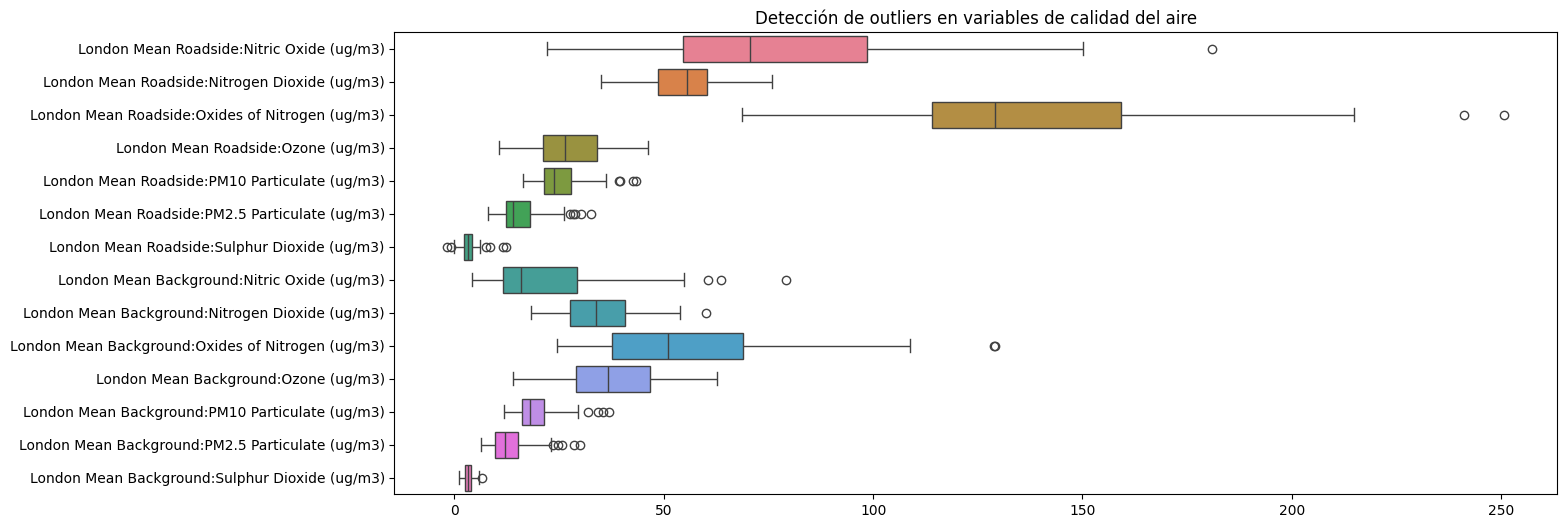

In [42]:
# Configuración estética
plt.figure(figsize=(15, 6))

# Dibujar boxplots para todas las columnas numéricas
sns.boxplot(data=air_quality, orient="h")

plt.title("Detección de outliers en variables de calidad del aire")
plt.show()

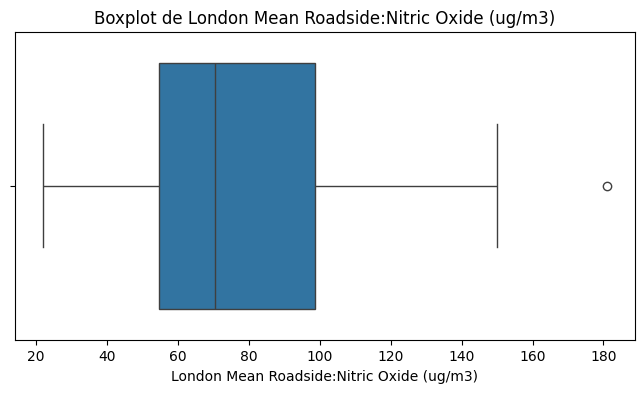

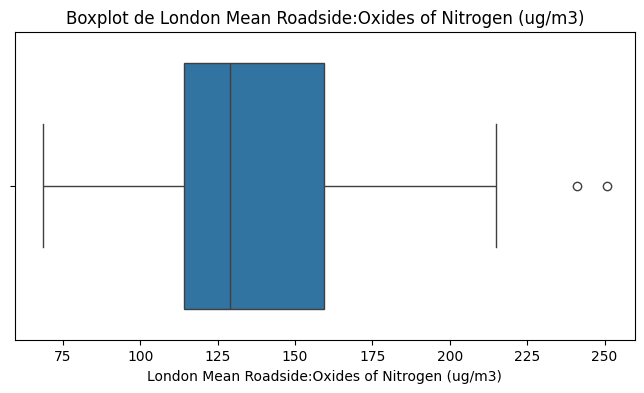

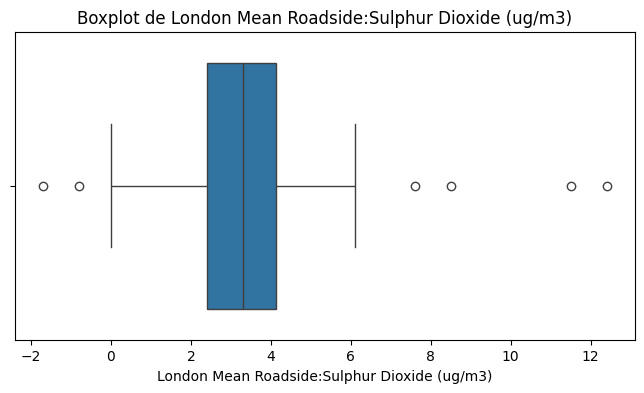

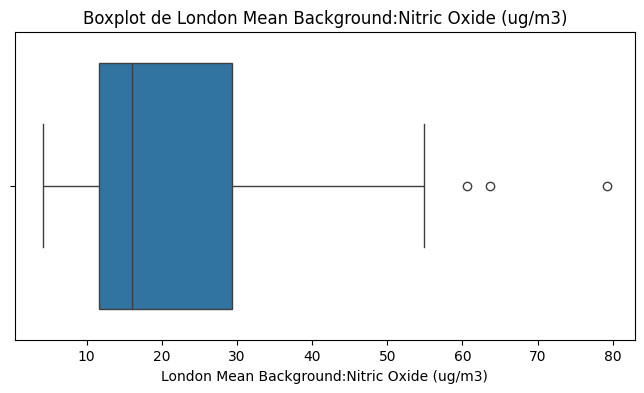

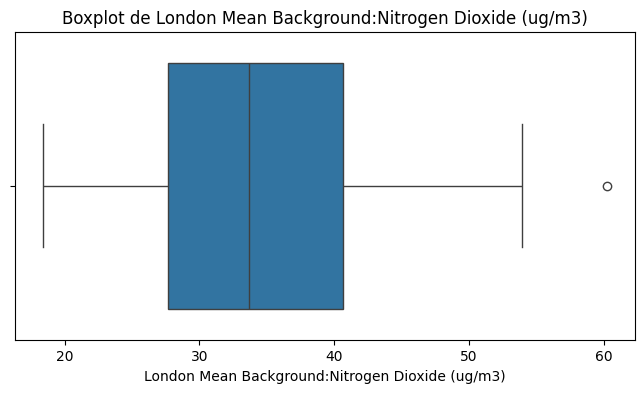

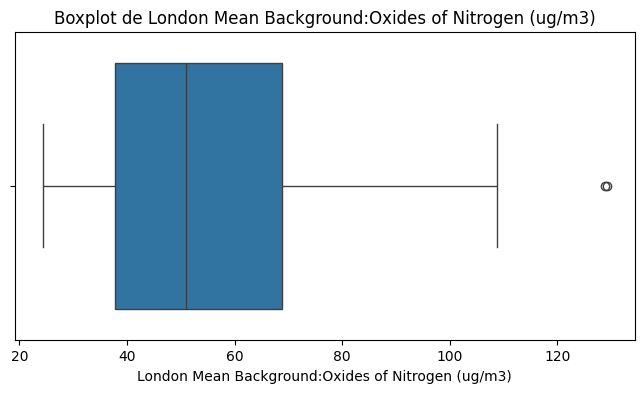

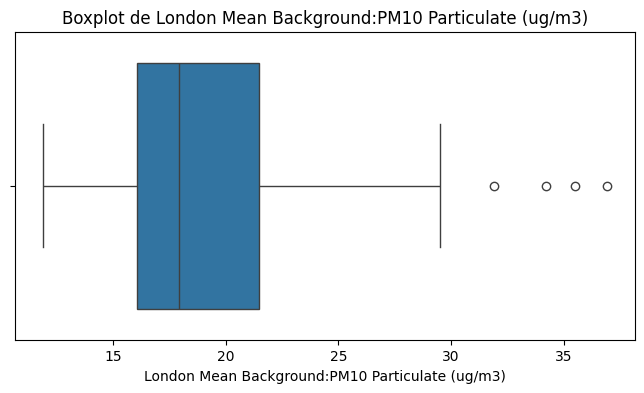

In [43]:
for col in air_quality.select_dtypes(include="number").columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=air_quality[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

Agrupamos por mes y calculamos el promedio de todas las columnas numéricas.

In [44]:
monthly_avg = air_quality.groupby("Month").mean(numeric_only=True)

monthly_avg.head()

London Mean Roadside:Nitric Oxide (ug/m3)  \
Month                                                   
2008-01-01                                        NaN   
2008-02-01                                        NaN   
2008-03-01                                        NaN   
2008-04-01                                        NaN   
2008-05-01                                        NaN   

            London Mean Roadside:Nitrogen Dioxide (ug/m3)  \
Month                                                       
2008-01-01                                           55.5   
2008-02-01                                           75.9   
2008-03-01                                           55.6   
2008-04-01                                           61.8   
2008-05-01                                           62.9   

            London Mean Roadside:Oxides of Nitrogen (ug/m3)  \
Month                                                         
2008-01-01                                              NaN   
2008-02-01                                              NaN   
2008-03-01                                              NaN   
2008-04-01                                              NaN   
2008-05-01                                              NaN   

            London Mean Roadside:Ozone (ug/m3)  \
Month                                            
2008-01-01                                29.5   
2008-02-01                                20.3   
2008-03-01                                40.1   
2008-04-01                                37.9   
2008-05-01                                46.3   

            London Mean Roadside:PM10 Particulate (ug/m3)  \
Month                                                       
2008-01-01                                           25.0   
2008-02-01                                           39.5   
2008-03-01                                           21.6   
2008-04-01                                           28.7   
2008-05-01                                           34.6   

            London Mean Roadside:PM2.5 Particulate (ug/m3)  \
Month                                                        
2008-01-01                                            14.7   
2008-02-01                                            28.8   
2008-03-01                                            12.3   
2008-04-01                                            20.5   
2008-05-01                                            27.5   

            London Mean Roadside:Sulphur Dioxide (ug/m3)  \
Month                                                      
2008-01-01                                           4.2   
2008-02-01                                           7.6   
2008-03-01                                           3.9   
2008-04-01                                           4.5   
2008-05-01                                           4.6   

            London Mean Background:Nitric Oxide (ug/m3)  \
Month                                                     
2008-01-01                                          NaN   
2008-02-01                                          NaN   
2008-03-01                                          NaN   
2008-04-01                                          NaN   
2008-05-01                                          NaN   

            London Mean Background:Nitrogen Dioxide (ug/m3)  \
Month                                                         
2008-01-01                                             42.3   
2008-02-01                                             60.2   
2008-03-01                                             39.8   
2008-04-01                                             44.0   
2008-05-01                                             44.1   

            London Mean Background:Oxides of Nitrogen (ug/m3)  \
Month                                                           
2008-01-01                                                NaN   
2008-02-01                                              

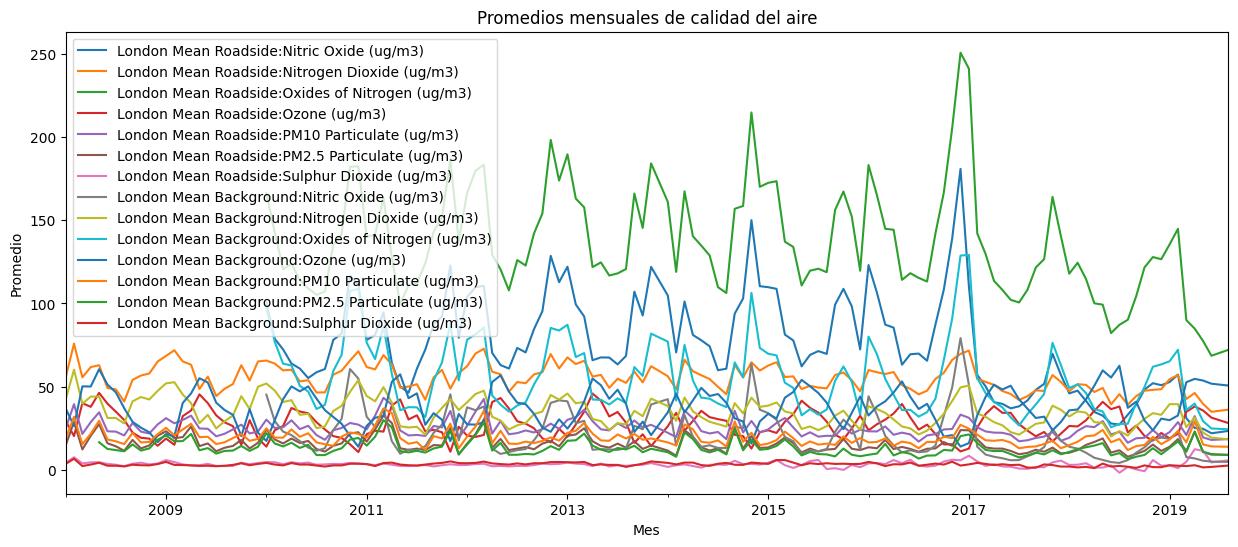

In [45]:
monthly_avg.plot(figsize=(15, 6))
plt.title("Promedios mensuales de calidad del aire")
plt.ylabel("Promedio")
plt.xlabel("Mes")
plt.legend(loc="best")
plt.show()

Con esto, ya tenemos listo el dataset de datos.

## MetObjects

Es un dataset que contiene información de más de 470000 obras de arte.

### Problemas

- Valores faltantes (ej: autor desconocido).
- Tipos de datos inconsistentes (fechas como texto).
- Posibles duplicados.

### Carga de datos

In [47]:
# Cargamos el dataset (archivo CSV)
met_objects = pd.read_csv("data/MetObjects.csv")

# Imprimimos los 5 primeros datos y 5 ultimos datos, para tratar de observar su estructura y alguna inconsistencia que se pueda ver a simple vista.
met_objects

C:\Users\vrvil\AppData\Local\Temp\ipykernel_3904\1912287518.py:2: DtypeWarning: Columns (5,7,10,11,12,13,14,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  met_objects = pd.read_csv("data/MetObjects.csv")


Object Number  Is Highlight  Is Timeline Work  Is Public Domain  \
0         1979.486.1         False             False             False   
1         1980.264.5         False             False             False   
2           67.265.9         False             False             False   
3          67.265.10         False             False             False   
4          67.265.11         False             False             False   
...              ...           ...               ...               ...   
484951    55.621.134         False             False             False   
484952      1977.646         False             False             False   
484953       33.40.1         False             False             False   
484954     170.1 C42          True             False             False   
484955     17.3.3457         False             False             False   

        Object ID Gallery Number           Department AccessionYear  \
0               1            NaN    The American Wing        1979.0   
1               2            NaN    The American Wing        1980.0   
2               3            NaN    The American Wing        1967.0   
3               4            NaN    The American Wing        1967.0   
4               5            NaN    The American Wing        1967.0   
...           ...            ...                  ...           ...   
484951     900605            NaN  Drawings and Prints          1955   
484952     900606            NaN  Drawings and Prints          1977   
484953     900633            NaN  Drawings and Prints          1933   
484954     900717            NaN        The Libraries           NaN   
484955     900748            NaN  Drawings and Prints          1917   

       Object Name                                              Title  ...  \
0             Coin                       One-dollar Liberty Head Coin  ...   
1             Coin                       Ten-dollar Liberty Head Coin  ...   
2             Coin                         Two-and-a-Half Dollar Coin  ...   
3             Coin                         Two-and-a-Half Dollar Coin  ...   
4             Coin                         Two-and-a-Half Dollar Coin  ...   
...            ...                                                ...  ...   
484951       Print                                       Holiday Card  ...   
484952       Print                                     Brooklyn Local  ...   
484953       Print                                Yesterday and Today  ...   
484954         NaN  De la loi du contraste simultané des couleurs,...  ...   
484955       Print  Madison Square - Fifth Avenue and Broadway at ...  ...   

       River Classification Rights and Reproduction  \
0        NaN            NaN                     NaN   
1        NaN            NaN                     NaN   
2        NaN            NaN                     NaN   
3        NaN            NaN                     NaN   
4        NaN            NaN                     NaN   
...      ...            ...                     ...   
484951   NaN         Prints                     NaN   
484952   NaN         Prints                     NaN   
484953   NaN         Prints                     NaN   
484954   NaN            NaN                     NaN   
484955   NaN         Prints                     NaN   

                                            Link Resource Object Wikidata URL  \
0        http://www.metmuseum.org/art/collection/search/1                 NaN   
1        http://www.metmuseum.org/art/collection/search/2                 NaN   
2        http://www.metmuseum.org/art/collection/search/3                 NaN   
3        http://www.metmuseum.org/art/collection/search/4                 NaN   
4        http://www.metmuseum.org/art/collection/search/5                 NaN   
...                                                   ...                 ...   
484951  http://www.metmuseum.org/art/collection/search...                 NaN   
484952  http://www.

Observamos que las columnas no tienen un nombre estandar, hay elementos NaN (nulos), posibles duplicados. A continuación, vamos a ver con cuantos datos estamos trabajando, y un poco de información extra de cada una de las columnas.

In [49]:
print("Dimensiones (filas, columnas):", met_objects.shape) # Observar las dimensiones del DataFrame (rows, cols)

print("Tamaño total (número de elementos):", met_objects.size) # Observar el tamaño total del DataFrame (número de elementos)

Dimensiones (filas, columnas): (484956, 54)
Tamaño total (número de elementos): 26187624


Ahora que sabemos cuantas filas hay, vamos a ver información extra de cada columna, con la intención de observar que tantos datos nulos tenemos y asegurarnos que el tipo de dato de cada columna sea el correcto.

In [51]:
# Veamos informacion mas detallada de cada una de las columnas

met_objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484956 entries, 0 to 484955
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Object Number            484956 non-null  object 
 1   Is Highlight             484956 non-null  bool   
 2   Is Timeline Work         484956 non-null  bool   
 3   Is Public Domain         484956 non-null  bool   
 4   Object ID                484956 non-null  int64  
 5   Gallery Number           49541 non-null   object 
 6   Department               484956 non-null  object 
 7   AccessionYear            481094 non-null  object 
 8   Object Name              482690 non-null  object 
 9   Title                    456153 non-null  object 
 10  Culture                  208190 non-null  object 
 11  Period                   91143 non-null   object 
 12  Dynasty                  23201 non-null   object 
 13  Reign                    11236 non-null   object 
 14  Port

Podemos observar que los tipos de datos son incorrectos para algunas columnas, por ende, tenemos tipos de datos incosistentes, algo que debemos arreglar, y si observamos y comparamos la información de la cantidad de filas que observamos anteriormente con la cantidad de datos no nulos contados, podemos ver que hay muchas filas con datos nulos, pero, antes de iniciar con eso, vamos a escribir el nombre de las columnas en snake_case

### Estandarización del nombre de las columnas

In [55]:
# Lo primero que haremos sera estandarizar el nombre de las columnas a snake_case

def snake_case(s: str):
    s = s.strip() # Eliminamos los espacios en blanco al inicio y al final
    s = re.sub(r'\s+', '_', s) # Reemplazamos los espacios en blanco por guiones bajos
    s = re.sub(r'\W+', '', s) # Eliminamos caracteres no alfanuméricos
    return s.lower() # Retornamos la cadena de texto convertida a minúsculas

# Aplicamos la funcion en cada columna
met_objects.columns = [snake_case(c) for c in met_objects.columns]

# Renombramos manualmente la columna accessionyear ya que observamos que es la unica 
# que no queda estandarizada correctamente debido a como estaba escrita desde un inicio
met_objects = met_objects.rename(columns={"accessionyear": "accession_year"})

met_objects.columns

Index(['object_number', 'is_highlight', 'is_timeline_work', 'is_public_domain',
       'object_id', 'gallery_number', 'department', 'accession_year',
       'object_name', 'title', 'culture', 'period', 'dynasty', 'reign',
       'portfolio', 'constituent_id', 'artist_role', 'artist_prefix',
       'artist_display_name', 'artist_display_bio', 'artist_suffix',
       'artist_alpha_sort', 'artist_nationality', 'artist_begin_date',
       'artist_end_date', 'artist_gender', 'artist_ulan_url',
       'artist_wikidata_url', 'object_date', 'object_begin_date',
       'object_end_date', 'medium', 'dimensions', 'credit_line',
       'geography_type', 'city', 'state', 'county', 'country', 'region',
       'subregion', 'locale', 'locus', 'excavation', 'river', 'classification',
       'rights_and_reproduction', 'link_resource', 'object_wikidata_url',
       'metadata_date', 'repository', 'tags', 'tags_aat_url',
       'tags_wikidata_url'],
      dtype='object')

Ya que estandarizamos las columnas, vamos a contar cuantos nulos hay por cada columna.

In [56]:
# Hay varios datos nulos en diversas columnas, para tener una informacion mas precisa de cuantos datos nulos hay
# en cada columna haremos lo siguiente

# Funcion para contar los valores nulos y unicos de cada columna, junto a su respectivo tipo de dato, 
# para tener un informe de calidad de los datos.

def quality_report(met_objects: pd.DataFrame) -> pd.DataFrame:
    rep = pd.DataFrame({
        "dtype": met_objects.dtypes.astype(str),
        "n_nulls": met_objects.isna().sum(),
        "pct_nulls": (met_objects.isna().mean()*100).round(2),
        "n_unique": met_objects.nunique(dropna=False)
    })
    return rep

# Imprimimos la informacion.

print(quality_report(met_objects))

# Buscar duplicados con la combinacion title + artist_display_name + accession_year
print("Duplicados exactos:", met_objects.duplicated(subset=["title", "artist_display_name", "accession_year"]).sum())

                           dtype  n_nulls  pct_nulls  n_unique
object_number             object        0       0.00    481656
is_highlight                bool        0       0.00         2
is_timeline_work            bool        0       0.00         2
is_public_domain            bool        0       0.00         2
object_id                  int64        0       0.00    484956
gallery_number            object   435415      89.78       564
department                object        0       0.00        19
accession_year            object     3862       0.80       317
object_name               object     2266       0.47     28632
title                     object    28803       5.94    245801
culture                   object   276766      57.07      7314
period                    object   393813      81.21      1892
dynasty                   object   461755      95.22       406
reign                     object   473720      97.68       397
portfolio                 object   458442      94.53   

Observamos que hay demasiados nulos en varias columnas, ademas de que tenemos muchos archivos duplicados.

### Reemplazo de valores nulos

Primeramente vamos a reemplazar los valores nulos por la cadena de texto "Unknown".

In [ ]:
# Reemplazaremos todos los valores nulos de las columnas de tipo texto del dataset por "Unknown"

met_objects.loc[:, met_objects.dtypes == "object"] = met_objects.loc[:, met_objects.dtypes == "object"].fillna("Unknown")

# Imprimimos la informacion

print(quality_report(met_objects))

                                  dtype  n_nulls  pct_nulls  n_unique
object_number                    object        0       0.00    309353
is_highlight                       bool        0       0.00         2
is_timeline_work                   bool        0       0.00         2
is_public_domain                   bool        0       0.00         2
object_id                         int64        0       0.00    311392
gallery_number                  float64   281413      90.37       372
department                       object        0       0.00        19
accession_year                    Int64     2532       0.81       155
object_name                      object        0       0.00     25623
title                            object        0       0.00    245801
culture                          object        0       0.00      5231
period                           object        0       0.00      1345
dynasty                          object        0       0.00       378
reign               

### Tipos de datos inconsistentes

Ahora, vamos a corregir el problema de los tipos de datos inconsistentes, para ello, usaremos los datos anteriores para saber que columnas debemos cambiar su tipo de dato.

In [57]:
# Convertimos las columnas que existen y que deben ser numéricas.

# gallery_number puede tener valores nulos, así que lo convertimos a float.
met_objects["gallery_number"] = pd.to_numeric(met_objects["gallery_number"], errors="coerce")

# accession_year puede tener valores nulos, así que primero la convertimos a float, luego a Int64 (soporta nulos).
met_objects["accession_year"] = pd.to_numeric(met_objects["accession_year"], errors="coerce").astype("Int64")

# constituent_id puede tener valores nulos, así que primero la convertimos a float, luego a Int64 (soporta nulos).
met_objects["constituent_id"] = pd.to_numeric(met_objects["constituent_id"], errors="coerce")

# Convertimos las columnas que existen que deben ser fechas.

met_objects["object_begin_date"] = pd.to_datetime(met_objects["object_begin_date"], errors="coerce")
met_objects["object_end_date"] = pd.to_datetime(met_objects["object_end_date"], errors="coerce")
met_objects["metadata_date"] = pd.to_datetime(met_objects["metadata_date"], errors="coerce")

### Datos duplicados

Vamos a buscar los datos duplicados con la combinacion de titulo, autor, y el año.

In [59]:
# Buscar duplicados con la combinacion title + artist_display_name + accession_year
print("Duplicados exactos:", met_objects.duplicated(subset=["title", "artist_display_name", "accession_year"]).sum())

Duplicados exactos: 0


Ahora, procedemos a eliminar todos esos elementos duplicados.

In [ ]:
# Eliminamos los duplicados.

met_objects = met_objects.drop_duplicates(subset=["title", "artist_display_name", "accession_year"])

### Eliminar columnas irrelevantes

Para terminar, eliminaremos las columnas irrelevantes, es decir, esas que no representan un información que sea completamente necesaria mantener, que serían principalmente las columnas que aún tengan muchos datos nulos. Primero, vamos a confirmar cuantas columnas siguen teniendo nulos y en que proporcion.

In [60]:
# Imprimimos la informacion

print(quality_report(met_objects))

                                  dtype  n_nulls  pct_nulls  n_unique
object_number                    object        0       0.00    309353
is_highlight                       bool        0       0.00         2
is_timeline_work                   bool        0       0.00         2
is_public_domain                   bool        0       0.00         2
object_id                         int64        0       0.00    311392
gallery_number                  float64   281413      90.37       372
department                       object        0       0.00        19
accession_year                    Int64     2532       0.81       155
object_name                      object        0       0.00     25623
title                            object        0       0.00    245801
culture                          object        0       0.00      5231
period                           object        0       0.00      1345
dynasty                          object        0       0.00       378
reign               

Podemos ver que columnas como lo son (*metadata_date, constituent_id, gallery_number*)

In [61]:
# Para terminar, podemos eliminar las columnas irrelevantes.
met_objects = met_objects.drop(columns=["metadata_date", "constituent_id", "gallery_number"])

Comprobamos que se hayan eliminado correctamente.

In [62]:
met_objects.info()

<class 'pandas.core.frame.DataFrame'>
Index: 311392 entries, 0 to 484955
Data columns (total 51 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   object_number            311392 non-null  object        
 1   is_highlight             311392 non-null  bool          
 2   is_timeline_work         311392 non-null  bool          
 3   is_public_domain         311392 non-null  bool          
 4   object_id                311392 non-null  int64         
 5   department               311392 non-null  object        
 6   accession_year           308860 non-null  Int64         
 7   object_name              311392 non-null  object        
 8   title                    311392 non-null  object        
 9   culture                  311392 non-null  object        
 10  period                   311392 non-null  object        
 11  dynasty                  311392 non-null  object        
 12  reign                

Vemos que ya no salen las columnas, por lo que se han eliminado correctamente. Y con esto ya terminamos la limpieza de este dataset.